In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import os


In [2]:
folder = 'collected_data/LiveData/'

# get all files in folder
files = glob.glob(folder + '*.csv')

dataset_live_list = []

for file in files:
    # read data from file
    data = pd.read_csv(file, header=None)
    
    # remove first column
    data = data.drop(data.columns[0], axis=1)
    
    # next 6 columns are the vibration data
    data = data.iloc[:, 0:6].values  # Convert to numpy array

    # Calculate the number of chunks (100-row segments)
    num_chunks = data.shape[0] // 100
    
    for i in range(num_chunks):
        chunk = data[i*100:(i+1)*100, :]
        dataset_live_list.append(chunk.transpose()[np.newaxis, :])

# Convert list to numpy array
dataset_live = np.concatenate(dataset_live_list, axis=0)

print(dataset_live.shape)

# label datasets as "LiveData"

dataset_live_labels = np.full((dataset_live.shape[0]), 'LiveData')

print(dataset_live_labels.shape)


# remove NAN rows along with their corresponding labels

# find the rows with NAN
nan_rows = np.argwhere(np.isnan(dataset_live))
print(nan_rows.shape)
print(nan_rows)

# remove the rows with NAN
dataset_live = np.delete(dataset_live, nan_rows[:, 0], axis=0)
dataset_live_labels = np.delete(dataset_live_labels, nan_rows[:, 0], axis=0)

# check that there are no more NAN rows
nan_rows = np.argwhere(np.isnan(dataset_live))
print(nan_rows.shape)
print(nan_rows)

# check that the shapes are the same
print(dataset_live.shape)
print(dataset_live_labels.shape)


(33630, 6, 100)
(33630,)
(246, 3)
[[10970     0     0]
 [10970     1     0]
 [10970     2     0]
 [10970     3     0]
 [10970     4     0]
 [10970     5     0]
 [23655     0    60]
 [23655     0    61]
 [23655     0    62]
 [23655     0    63]
 [23655     0    64]
 [23655     0    65]
 [23655     0    66]
 [23655     0    67]
 [23655     0    68]
 [23655     0    69]
 [23655     0    70]
 [23655     0    71]
 [23655     0    72]
 [23655     0    73]
 [23655     0    74]
 [23655     0    75]
 [23655     0    76]
 [23655     0    77]
 [23655     0    78]
 [23655     0    79]
 [23655     0    80]
 [23655     0    81]
 [23655     0    82]
 [23655     0    83]
 [23655     0    84]
 [23655     0    85]
 [23655     0    86]
 [23655     0    87]
 [23655     0    88]
 [23655     0    89]
 [23655     0    90]
 [23655     0    91]
 [23655     0    92]
 [23655     0    93]
 [23655     0    94]
 [23655     0    95]
 [23655     0    96]
 [23655     0    97]
 [23655     0    98]
 [23655     0    99]


In [3]:


def newDataReader(datapath):
    
    with open(datapath, 'r') as file:
        lines = file.readlines()

    data_blocks = []  # to store individual data blocks of 1000 lines each

    i = 0
    while i < len(lines):
        line = lines[i].strip()
        if '----' in line:
            i += 1
            continue
        else:
            start = i
            # Find the end of this block (either another dash line or end of file)
            while i < len(lines) and '----' not in lines[i]:
                i += 1
            end = i
            
            block = lines[start:end]
            data = [list(map(float, item.split(','))) for item in block if ',' in item]  # convert string to list of floats
            
            # Check the length of data, adjust and log if necessary
            if len(data) < 1000:
                padding = [[0.0] * 9 for _ in range(1000 - len(data))]
                data.extend(padding)
                print(f"Data block starting at line {start} has less than 1000 lines. Padding with zeros.")
            elif len(data) > 1000:
                data = data[:1000]
                print(f"Data block starting at line {start} has more than 1000 lines. Truncating to 1000.")
            
            data_blocks.append(data)

    # Convert list of data blocks into a 3D numpy array
    datasets_array = np.array(data_blocks)
    
    return datasets_array


folder = "collected_data/"

dataset1_label = ["Healthy2", "Healthy3", "Loose2", "Loose3", "Cavitation", "Cavitation2", "Cavitation3"]

all_data = []
all_labels = []

for label in dataset1_label:
    files = glob.glob(folder + label + "/*")
    Dataset = []
    for file in files:
        print(file)
        data_segment = newDataReader(file)
        Dataset.append(data_segment)
    Dataset_np = np.concatenate(Dataset, axis=0)  # shape becomes (9, total_n_for_this_label, 1000)
    Dataset_np = np.transpose(Dataset_np, (0, 2, 1))  # shape becomes (total_n_for_this_label, 9, 1000)

    # Append to main data list
    all_data.append(Dataset_np)
    
    # Create and append labels for this data
    labels_for_this_data = [label] * Dataset_np.shape[0]  # repeat the label 'total_n_for_this_label' times
    all_labels.extend(labels_for_this_data)

# remove last 3 columns
# all_data = [data[:, :6, :] for data in all_data]

# Combine all data segments
all_data_np = np.concatenate(all_data, axis=0)  # shape: (total_n, 9, 1000)

# Convert all labels to numpy array for consistency
all_labels_np = np.array(all_labels)


collected_data/Healthy2\2023-09-12T16-00-00.txt
collected_data/Healthy2\2023-09-12T17-00-00.txt
collected_data/Healthy2\2023-09-12T18-00-00.txt
collected_data/Healthy2\2023-09-12T19-00-00.txt
collected_data/Healthy2\2023-09-12T20-00-00.txt
collected_data/Healthy2\2023-09-12T21-00-00.txt
collected_data/Healthy2\2023-09-12T22-00-01.txt
collected_data/Healthy2\2023-09-12T23-00-00.txt
collected_data/Healthy2\2023-09-13T00-00-00.txt
collected_data/Healthy2\2023-09-13T01-00-00.txt
collected_data/Healthy2\2023-09-13T02-00-00.txt
collected_data/Healthy2\2023-09-13T03-00-00.txt
collected_data/Healthy2\2023-09-13T04-00-00.txt
collected_data/Healthy2\2023-09-13T05-00-00.txt
collected_data/Healthy2\2023-09-13T06-00-00.txt
collected_data/Healthy2\2023-09-13T07-00-00.txt
collected_data/Healthy2\2023-09-13T08-00-00.txt
collected_data/Healthy2\2023-09-13T09-00-00.txt
collected_data/Healthy2\2023-09-13T10-00-00.txt
collected_data/Healthy2\2023-09-13T11-00-01.txt
collected_data/Healthy2\2023-09-13T12-00

In [4]:


print(all_data_np.shape)  # This should give (total_n, 9, 1000)
print(all_labels_np.shape)  # This should give (total_n,)

# take out last 3 columns to store in a separate variable
all_data_np_last3 = all_data_np[:, 6:, :]
all_data_np = all_data_np[:, :6, :]
print(all_data_np.shape)
print(all_data_np_last3.shape)




(121142, 9, 1000)
(121142,)
(121142, 6, 1000)
(121142, 3, 1000)


In [5]:
# to convert to 100 sized segments

new_data = []
new_data_last3 = [] # store several instaces of idx (1 - 0, 2)

for sample in all_data_np:
    for i in range(0, 1000, 100):
        new_data.append(sample[:, i:i+100])
        
for sample in all_data_np_last3:
    for i in range(0, 1000, 100):
        new_data_last3.append([sample[1][0] - sample[0][0], sample[2][0]])        


# Convert new_data list to numpy array
all_data_np_reshaped = np.array(new_data)

# Adjust labels
all_labels_np_reshaped = np.repeat(all_labels_np, 10)

# Convert new_data_last3 list to numpy array
all_data_np_last3_reshaped = np.array(new_data_last3)

# erase new_data
del new_data

# add live data to the end of the dataset

# all_data_np_reshaped = np.concatenate((all_data_np_reshaped, dataset_live), axis=0)
# all_labels_np_reshaped = np.concatenate((all_labels_np_reshaped, dataset_live_labels), axis=0)

print(all_data_np_reshaped.shape)
print(all_labels_np_reshaped.shape)
print(all_data_np_last3_reshaped.shape)


(1211420, 6, 100)
(1211420,)
(1211420, 2)


In [6]:


# normalize the data for each axis for the first 6 axes from -1 to 1
# the last 3 axes are already in the range of 0 to 1
# use MinMaxScaler from sklearnW
data_to_use = all_data_np_reshaped
labels_to_use = all_labels_np_reshaped
last2_to_use = all_data_np_last3_reshaped

# clear reshaped data
del all_data_np_reshaped
del all_labels_np_reshaped


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
for i in range(6):
    data_to_use[:, i, :] = scaler.fit_transform(data_to_use[:, i, :])





In [7]:
# make the true labels, Healthy, Healthy2, Healthy3 are all Healthy, Loose, Loose2 are all Loose, Cavitation, Cavitation2, Cavitation3 are all Cavitation
true_labels = labels_to_use.copy()

# true_labels[true_labels == "Healthy2"] = "Healthynew"
# true_labels[true_labels == "Healthy3"] = "Healthynew"

# true_labels[true_labels == "Loose2"] = "Loosenew"
# true_labels[true_labels == "Loose3"] = "Loosenew"

# true_labels[true_labels == "Cavitation2"] = "Cavitation"
# true_labels[true_labels == "Cavitation3"] = "Cavitation"


In [8]:
# choose one axis so that we can do ml on it
import seaborn as sns

# all_data_oneaxis = all_data_np[:, 0, :]  # shape: (total_n, 1000)

# create new dataframe that consists of the combination of the first 100 data points of each segment for the first 6 segments resulting in (total_n, 600)

# normal
# all_data_concat = np.concatenate((data_to_use[:, 0,:100], data_to_use[:, 1, :100], data_to_use[:, 2, :100], data_to_use[:, 3, :100], data_to_use[:, 4, :100], data_to_use[:, 5, :100]), axis=1)

# 2d prep
all_data_concat = np.concatenate((data_to_use[:, 0,:96], data_to_use[:, 1, :96], data_to_use[:, 2, :96], data_to_use[:, 3, :96], data_to_use[:, 4, :96], data_to_use[:, 5, :96]), axis=1)
print(all_data_concat.shape)


# remove Healthy and Loose from the data

# all_data_concat = all_data_concat[true_labels != "Healthy"]
# true_labels = true_labels[true_labels != "Healthy"]
# all_data_concat = all_data_concat[true_labels != "Loose"]
# true_labels = true_labels[true_labels != "Loose"]

print(all_data_concat.shape)
print(true_labels.shape)
print(last2_to_use.shape)



# skip to end for 2d conv

(1211420, 576)
(1211420, 576)
(1211420,)
(1211420, 2)


In [9]:
# USE THIS CELL TO BALANCE TO BE BIG DATA

print(all_data_concat.shape)
print(true_labels.shape)
print(last2_to_use.shape)

# print occurences of each label
unique, counts = np.unique(true_labels, return_counts=True)
print(dict(zip(unique, counts)))

all_data_concat_cut = np.zeros((0, 576))
true_labels_cut = np.zeros((0))
last2_to_use_cut = np.zeros((0, 2))

# remove Cavitation10 from the data
all_data_concat = all_data_concat[true_labels != "Cavitation10"]
last2_to_use = last2_to_use[true_labels != "Cavitation10"]
true_labels = true_labels[true_labels != "Cavitation10"]

import numpy as np

# Create separate arrays for each data subtype
cavitation_indices = np.where((true_labels == 'Cavitation') | (true_labels == 'Cavitation2') | (true_labels == 'Cavitation3'))[0]
healthy_indices = np.where((true_labels == 'Healthy2') | (true_labels == 'Healthy3'))[0]
loose_indices = np.where((true_labels == 'Loose2') | (true_labels == 'Loose3'))[0]

# Get minimum count for balancing
min_count = min(len(cavitation_indices), len(healthy_indices), len(loose_indices))

# If you want data to be spread evenly, you may want to shuffle indices before truncation
np.random.shuffle(cavitation_indices)
np.random.shuffle(healthy_indices)
np.random.shuffle(loose_indices)

# Truncate to the smallest group size to balance classes
cavitation_indices = cavitation_indices[:min_count]
healthy_indices = healthy_indices[:min_count]
loose_indices = loose_indices[:min_count]

# Extract and combine data and labels
all_data_concat = np.vstack((all_data_concat[cavitation_indices, :], 
                               all_data_concat[healthy_indices, :], 
                               all_data_concat[loose_indices, :]))

# For last2_to_use data, similar extraction and combination can be done
last2_to_use = np.vstack((last2_to_use[cavitation_indices, :], 
                            last2_to_use[healthy_indices, :], 
                            last2_to_use[loose_indices, :]))

# Create new labels
true_labels = np.hstack((np.repeat('Cavitation', min_count), 
                        np.repeat('Healthy', min_count), 
                        np.repeat('Loose', min_count)))

# Optionally, shuffle the combined data and labels to randomize the order
# shuffled_indices = np.arange(new_labels.shape[0])
# np.random.shuffle(shuffled_indices)

# all_data_combined = all_data_combined[shuffled_indices, :]
# last2_combined = last2_combined[shuffled_indices, :]
# new_labels = new_labels[shuffled_indices]

print(all_data_concat.shape)
print(last2_to_use.shape)
print(true_labels.shape)

# count occurences of each label
unique, counts = np.unique(true_labels, return_counts=True)
print(dict(zip(unique, counts)))







(1211420, 576)
(1211420,)
(1211420, 2)
{'Cavitation': 63590, 'Cavitation2': 85890, 'Cavitation3': 205830, 'Healthy2': 398390, 'Healthy3': 118530, 'Loose2': 82250, 'Loose3': 256940}
(1017570, 576)
(1017570, 2)
(1017570,)
{'Cavitation': 339190, 'Healthy': 339190, 'Loose': 339190}


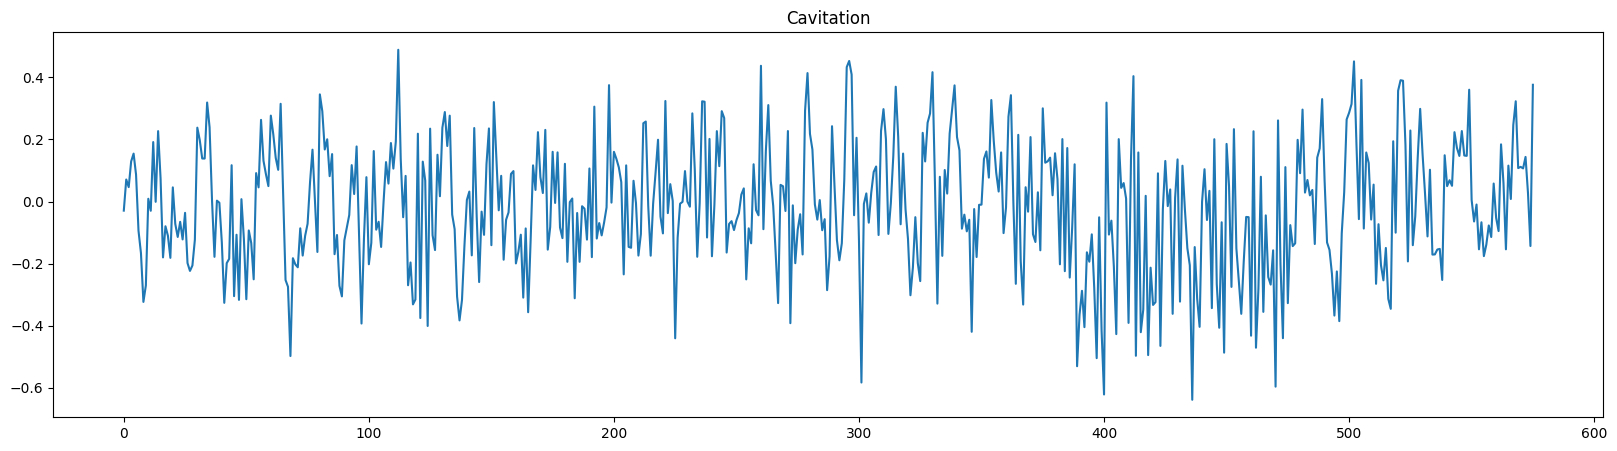

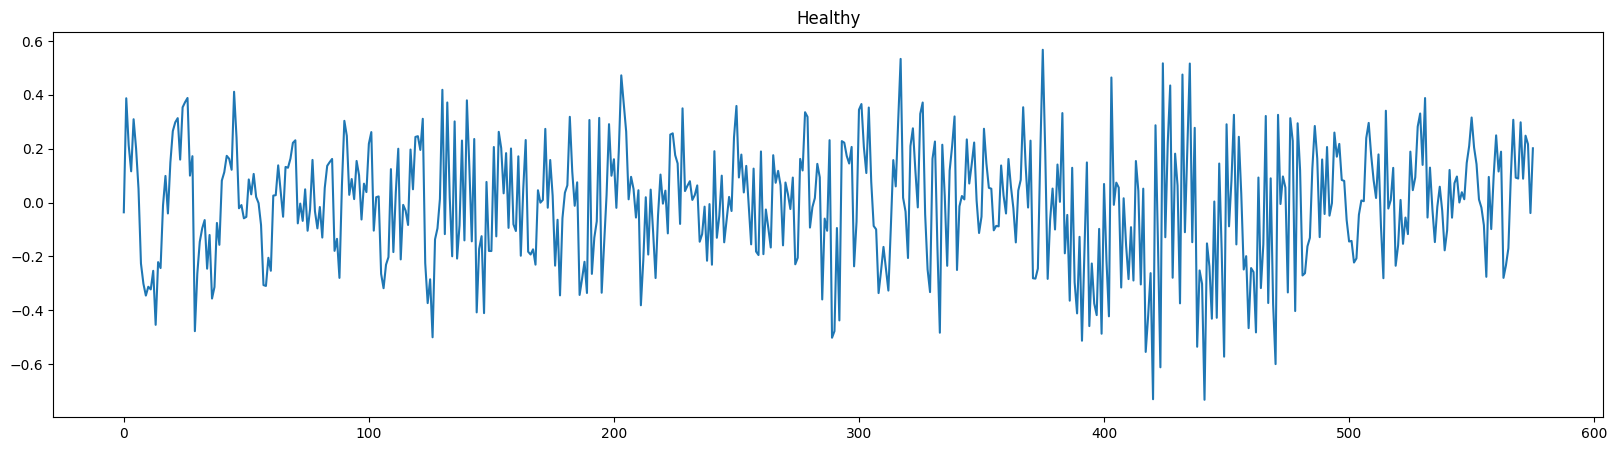

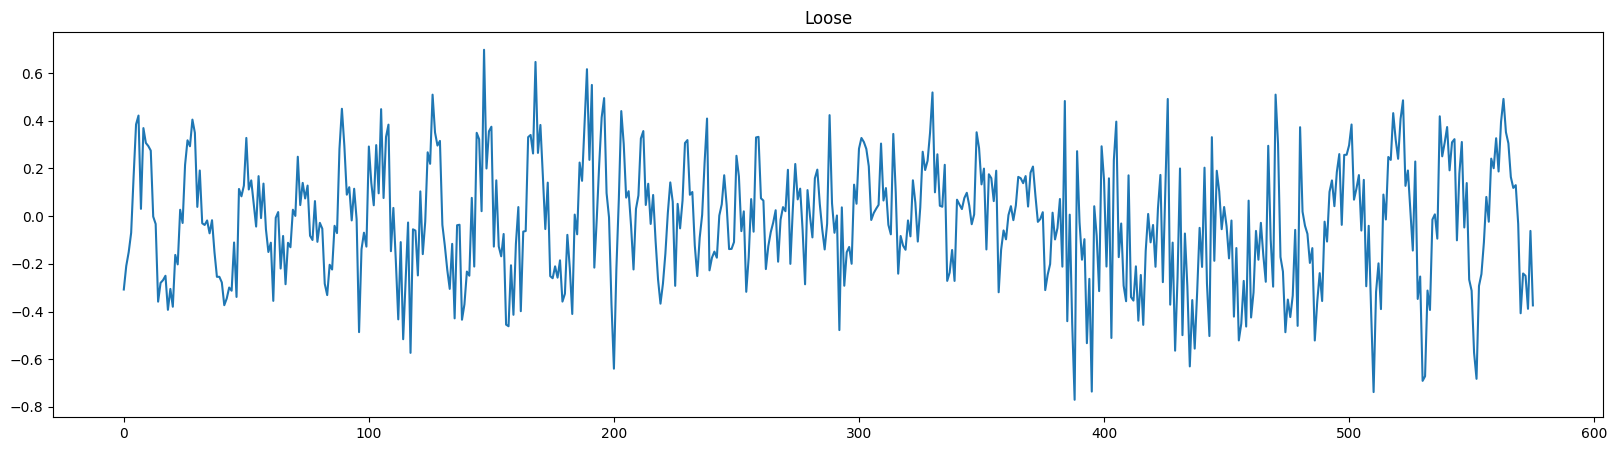

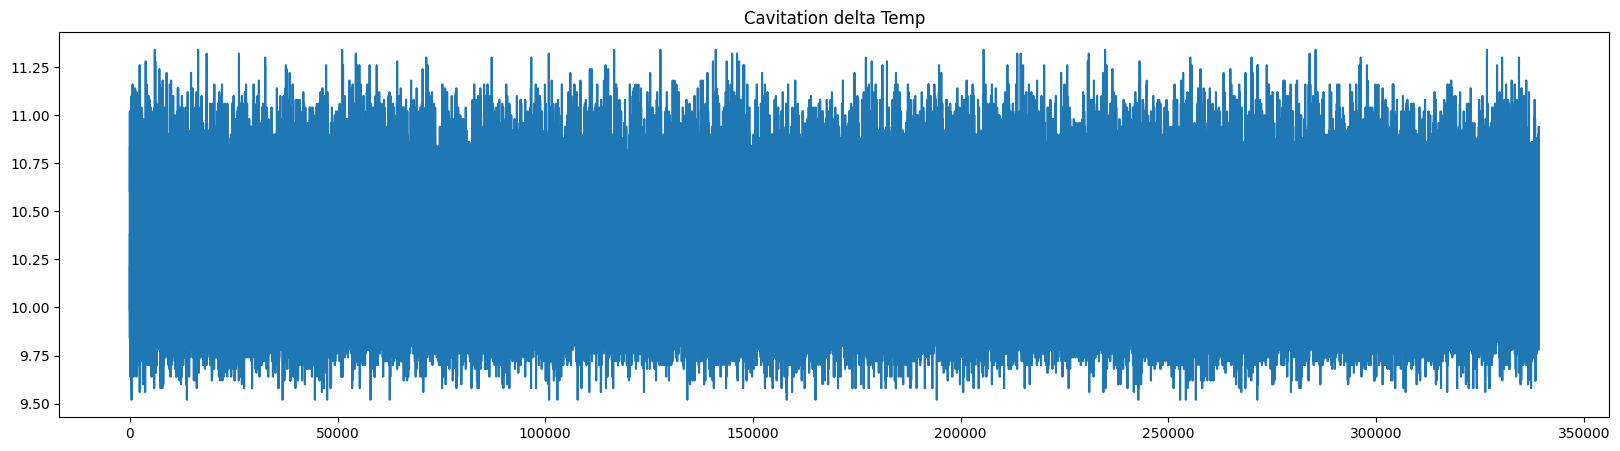

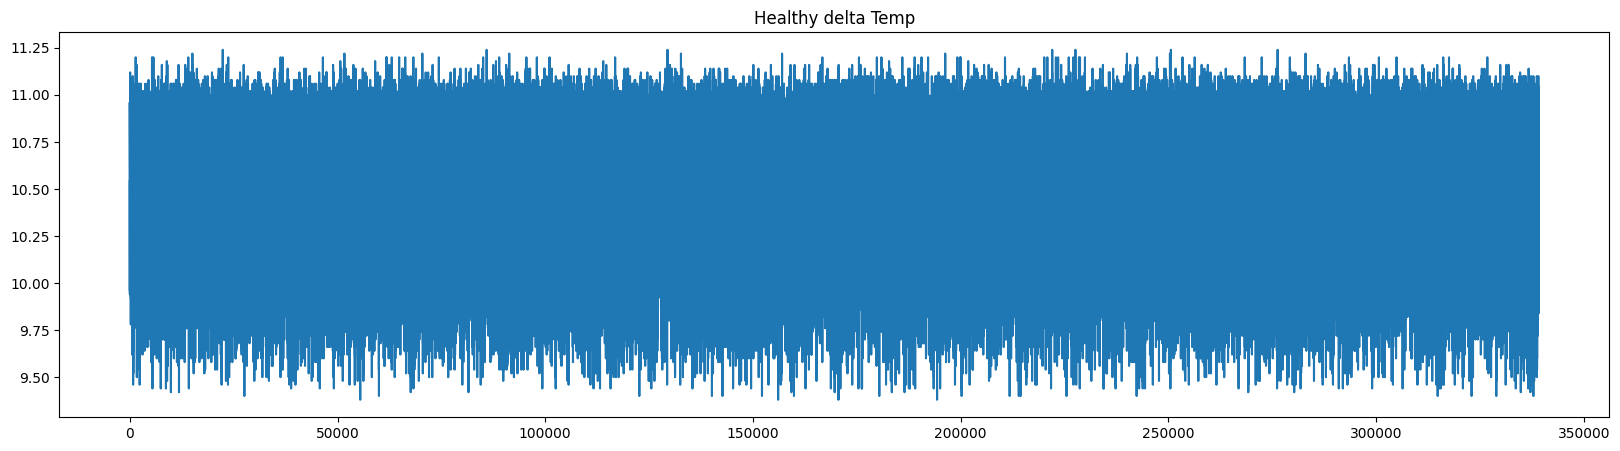

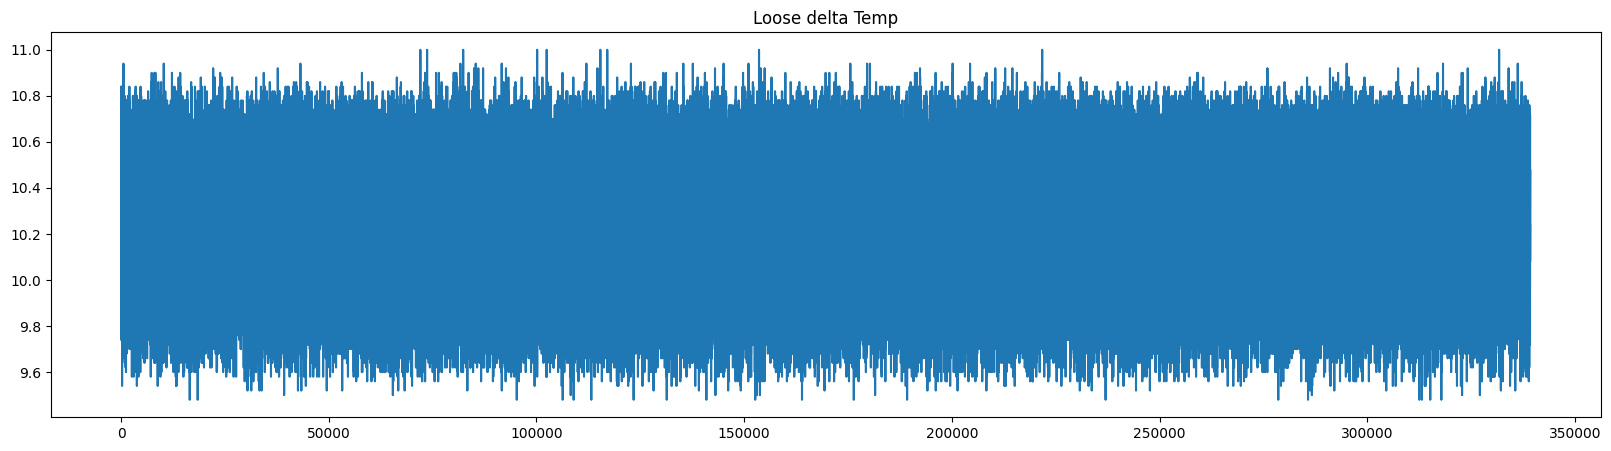

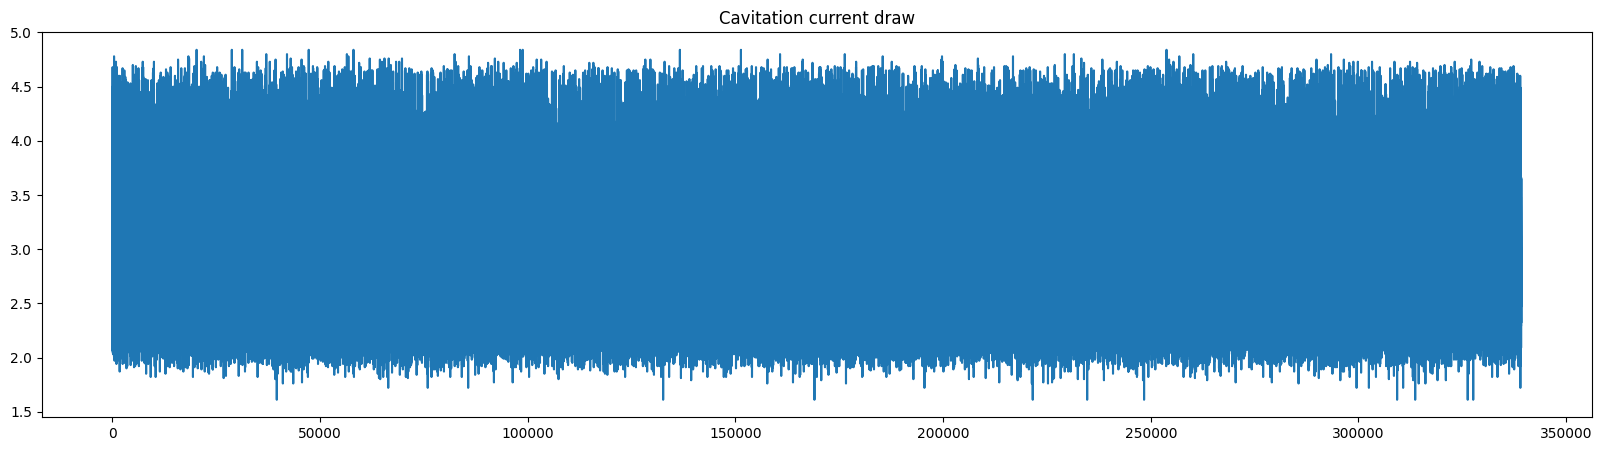

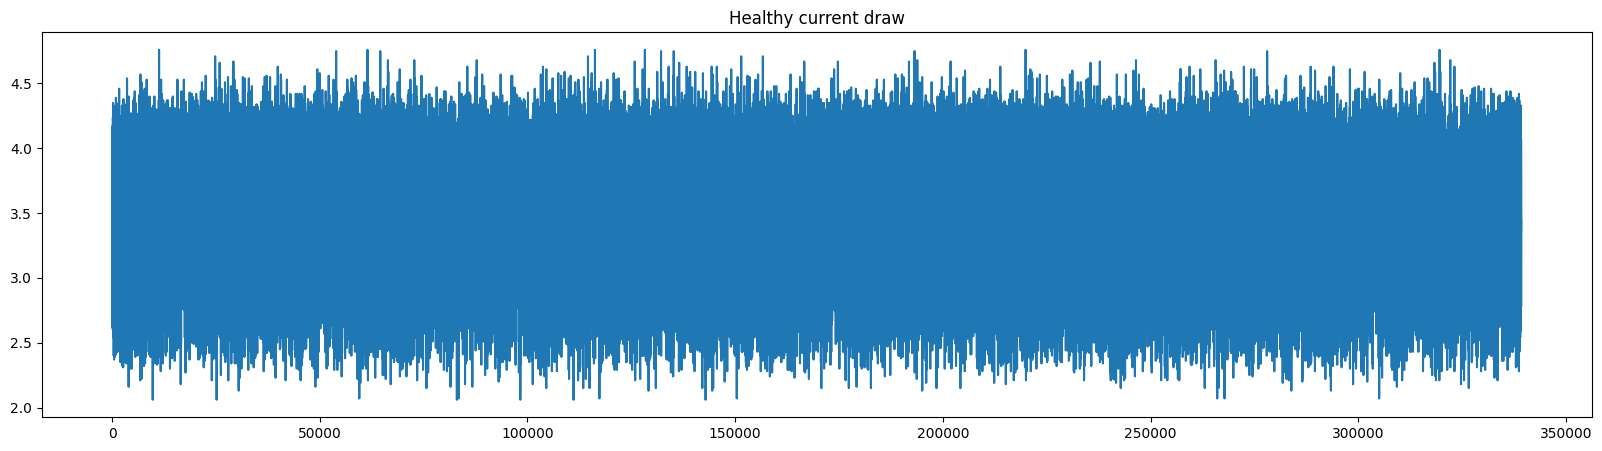

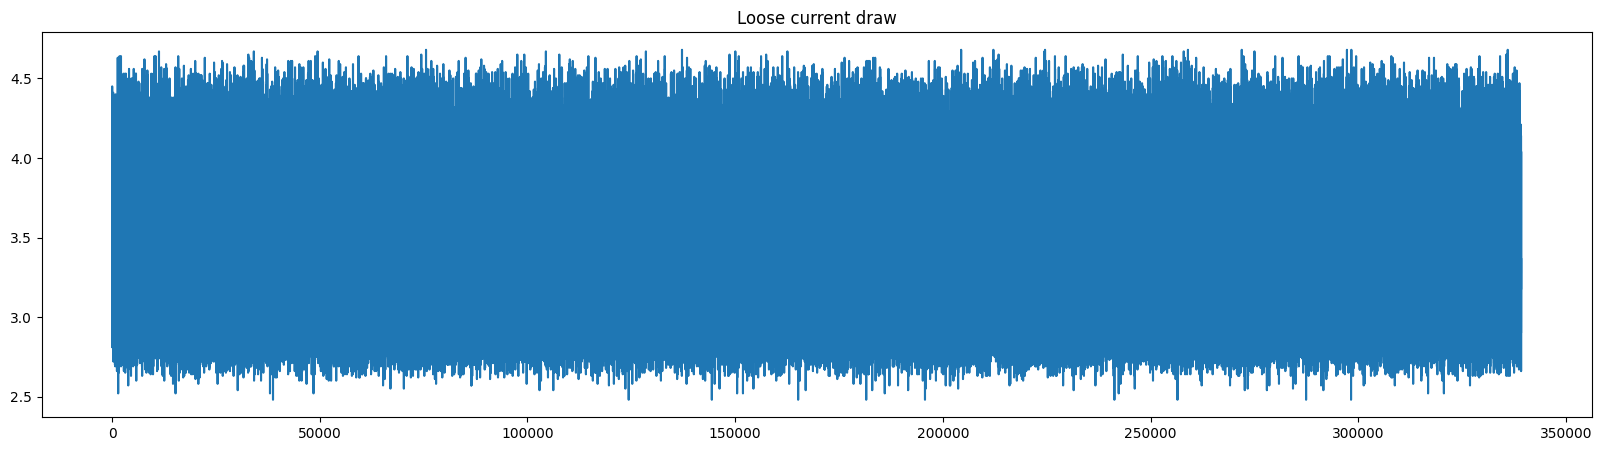

In [13]:
# Visualize the data for each label and segment
for i in range(len(unique)):
    plt.figure(figsize=(20, 5))
    plt.title(unique[i])
    plt.plot(all_data_concat[true_labels == unique[i], :][0])
    plt.show()

# last2_to_use_cut is a array with delta Temp and current draw
# Visualize all the delta Temp for each label in a sequence graph
# Visualize all the current draw for each label in a sequence graph
for i in range(len(unique)):
    plt.figure(figsize=(20, 5))
    plt.title(unique[i] + " delta Temp")
    plt.plot(last2_to_use[true_labels == unique[i], :][:, 0])
    plt.show()
    
for i in range(len(unique)):
    plt.figure(figsize=(20, 5))
    plt.title(unique[i] + " current draw")
    plt.plot(last2_to_use[true_labels == unique[i], :][:, 1])
    plt.show()



In [12]:
# for Loose, anything above 50 delta Temp is considered anomalous, remove those

all_data_concat = all_data_concat[last2_to_use[:, 0] < 50]
true_labels = true_labels[last2_to_use[:, 0] < 50]
last2_to_use = last2_to_use[last2_to_use[:, 0] < 50]

print(all_data_concat.shape)
print(true_labels.shape)
print(last2_to_use.shape)

# count occurences of each label
unique, counts = np.unique(true_labels, return_counts=True)
print(dict(zip(unique, counts)))

(1017560, 576)
(1017560,)
(1017560, 2)
{'Cavitation': 339190, 'Healthy': 339190, 'Loose': 339180}


In [14]:
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# reshape the data to be (n, 24, 24, 1)
X = all_data_concat.reshape(all_data_concat.shape[0], 24, 24, 1)
Y = true_labels
X_last2 = last2_to_use


X_training = X
Y_training = Y
X_last2_training = X_last2


encoder = LabelEncoder()
encoder.fit(Y_training)
encoded_Y = encoder.transform(Y_training)
OHE_Y_training = to_categorical(encoded_Y)


print(X_training.shape)
print(X_last2_training.shape)
print(OHE_Y_training.shape)

print(encoder.classes_)


(1017560, 24, 24, 1)
(1017560, 2)
(1017560, 3)
['Cavitation' 'Healthy' 'Loose']


[array([263248, 111427,  31223, 285661,  78311], dtype=int64), array([409489, 595866, 442617, 348381, 545049], dtype=int64), array([1011636,  789597,  788075,  728906,  980121], dtype=int64)]


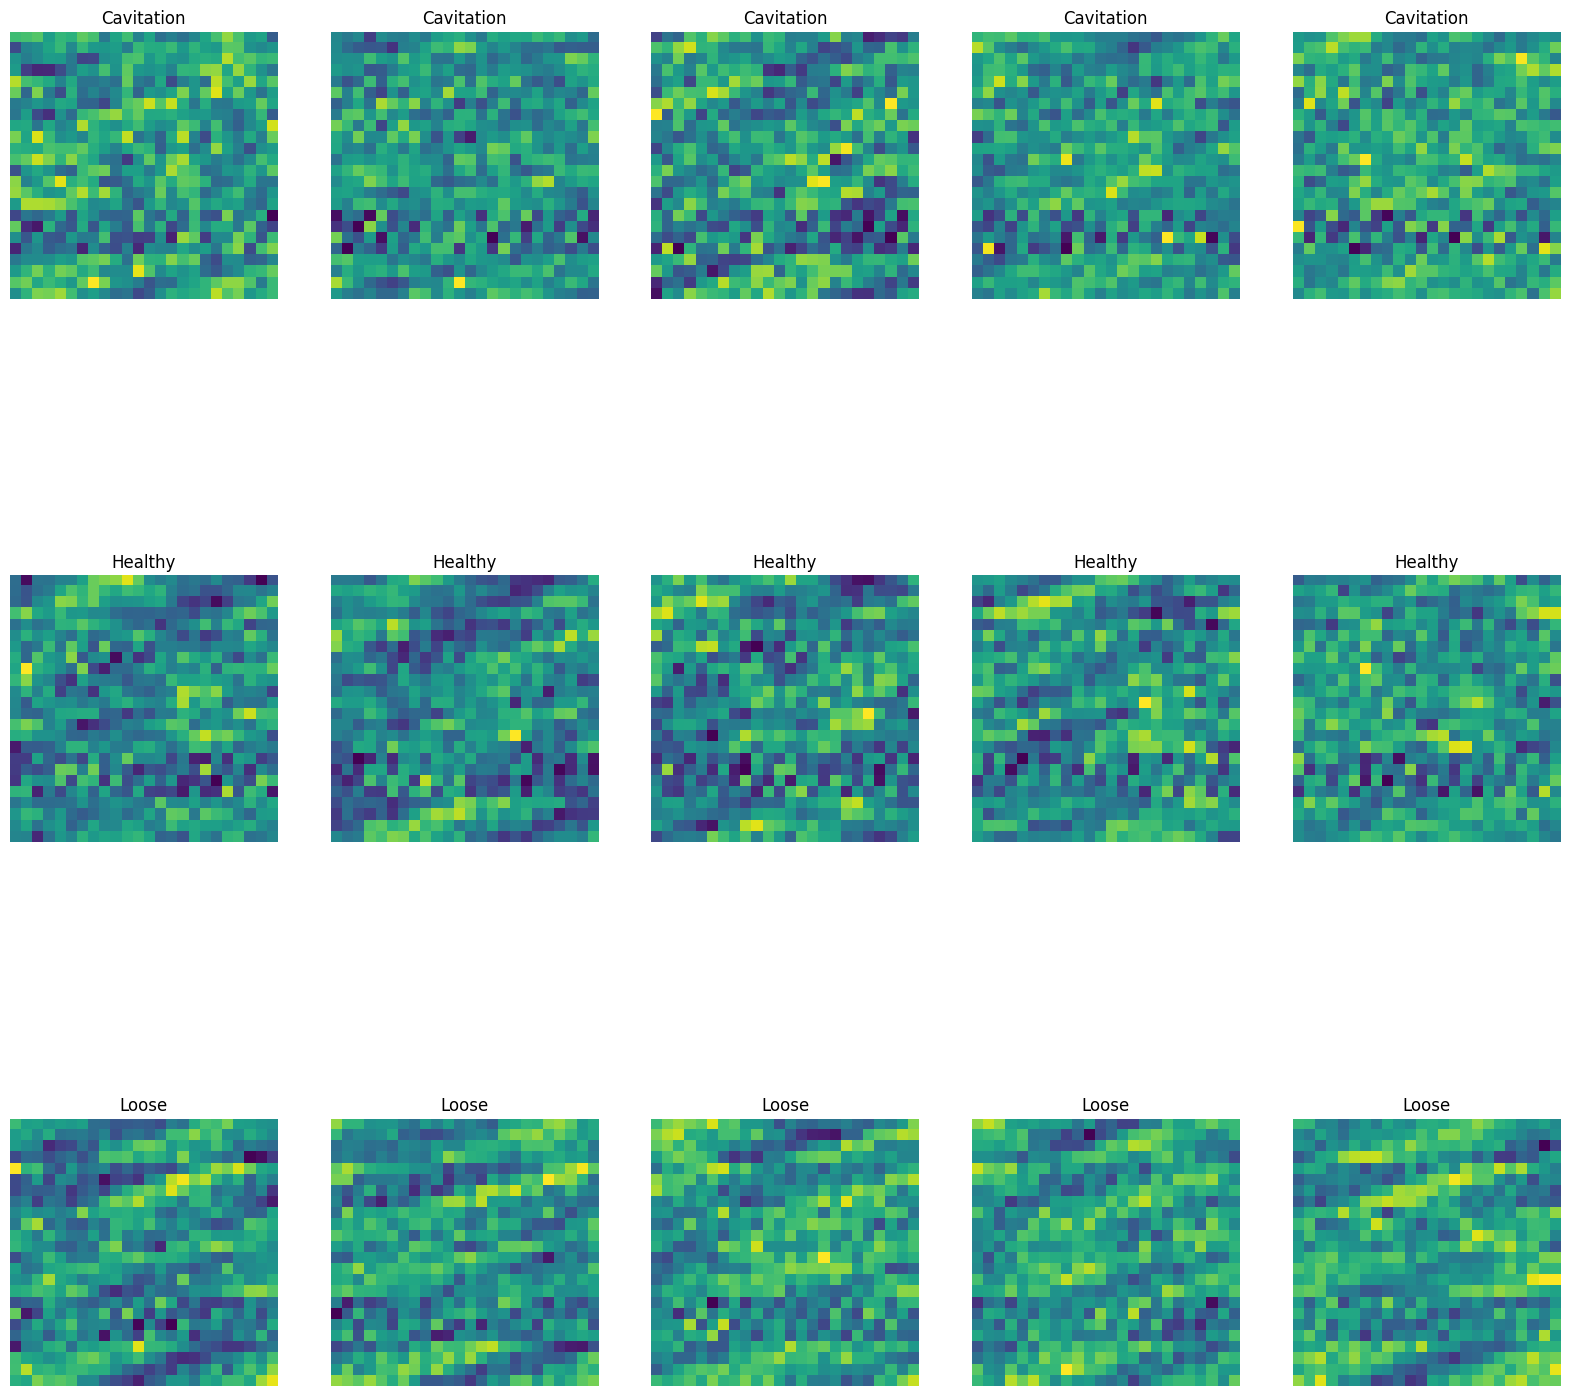

In [15]:
from matplotlib.pyplot import imread

# visualize random 5 images from each class

# first, get the indices of random 5 images from each class
indices = []
for i in range(len(encoder.classes_)):
    indices.append(np.random.choice(np.argwhere(encoded_Y == i).flatten(), 5, replace=False))

print(indices)

# now, plot the images using grayscale
fig, ax = plt.subplots(len(encoder.classes_), 5, figsize=(20, 20))
for i in range(len(encoder.classes_)):
    for j in range(5):
        ax[i, j].imshow(X_training[indices[i][j], :, :, 0])
        ax[i, j].set_title(encoder.classes_[i])
        ax[i, j].axis('off')

plt.show()


In [16]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

from sklearn.model_selection import train_test_split

# need to split last2 together with the data
X_train, X_test, y_train, y_test, X_last2_train, X_last2_test = train_test_split(X_training, OHE_Y_training, X_last2_training, test_size=0.25, random_state=42, shuffle=True)

# X_train, X_test, y_train, y_test = train_test_split(X_training, OHE_Y_training, test_size=0.25, random_state=42, shuffle=True)


no_classes = len(encoder.classes_)

# 2d convolutional categorical model without last 2
# model = Sequential()
# model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='elu', input_shape=(24, 24, 1), padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
# model.add(Dropout(0.2))

# model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='elu', padding='same'))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(32, activation='elu'))
# model.add(Dropout(0.2))

# model.add(Dense(no_classes, activation='softmax'))

# 2d convolutional categorical model with last 2

inputs1 = Input(shape=(24, 24, 1))
conv1 = Conv2D(filters=12, kernel_size=(3,3), activation='elu', padding='same')(inputs1)
drop1 = Dropout(0.2)(conv1)
pool1 = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same')(drop1)
conv2 = Conv2D(filters=16, kernel_size=(3,3), activation='elu', padding='same')(pool1)
drop2 = Dropout(0.2)(conv2)
pool2 = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same')(drop2)
flat1 = Flatten()(pool2)
ann1 = Dense(32, activation='elu')(flat1)
drop3 = Dropout(0.2)(ann1)


inputs2 = Input(shape=(2))
flat2 = Flatten()(inputs2)

# merge feature extractors
merged = tf.keras.layers.concatenate([drop3, flat2])

# # interpretation layer
dense1 = Dense(16, activation='elu')(merged)

outputs = Dense(no_classes, activation='softmax')(dense1)
model = Model(inputs=[inputs1, inputs2], outputs=outputs)


model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 24, 24, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 24, 24, 12)   120         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 24, 24, 12)   0           ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 12, 12, 12)   0           ['dropout[0][0]']                
                                                                                              

In [17]:

# early stopping criteria
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = model.fit([X_train, X_last2_train],
                    y_train,
                    batch_size=3000,
                    epochs=50,
                    verbose=1,
                    shuffle=True,
                    callbacks=[es],
                    validation_data=([X_test, X_last2_test], y_test))

# history = model.fit(X_train,
#                     y_train,
#                     batch_size=3000,
#                     epochs=50,
#                     verbose=1,
#                     shuffle=True,
#                     callbacks=[es],
#                     validation_data=(X_test, y_test))

Epoch 1/50
255/255 [==============================] - 9s 16ms/step - loss: 0.6230 - accuracy: 0.6942 - val_loss: 0.2091 - val_accuracy: 0.9225
Epoch 2/50
255/255 [==============================] - 3s 13ms/step - loss: 0.1419 - accuracy: 0.9475 - val_loss: 0.1488 - val_accuracy: 0.9408
Epoch 3/50
255/255 [==============================] - 3s 13ms/step - loss: 0.1039 - accuracy: 0.9614 - val_loss: 0.1089 - val_accuracy: 0.9576
Epoch 4/50
255/255 [==============================] - 3s 13ms/step - loss: 0.0856 - accuracy: 0.9686 - val_loss: 0.0982 - val_accuracy: 0.9610
Epoch 5/50
255/255 [==============================] - 3s 13ms/step - loss: 0.0738 - accuracy: 0.9730 - val_loss: 0.0955 - val_accuracy: 0.9615
Epoch 6/50
255/255 [==============================] - 3s 13ms/step - loss: 0.0651 - accuracy: 0.9764 - val_loss: 0.0687 - val_accuracy: 0.9735
Epoch 7/50
255/255 [==============================] - 3s 13ms/step - loss: 0.0583 - accuracy: 0.9788 - val_loss: 0.0536 - val_accuracy: 0.9797

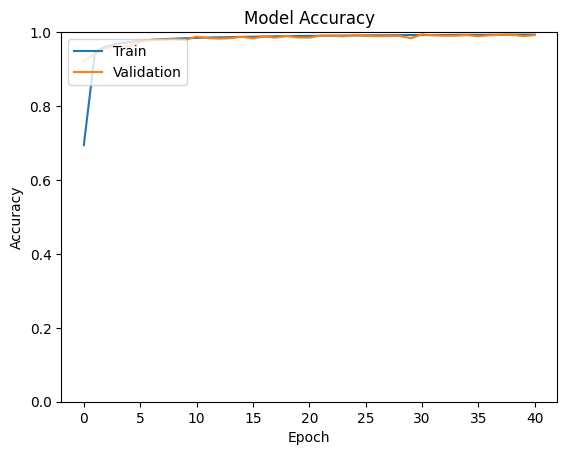

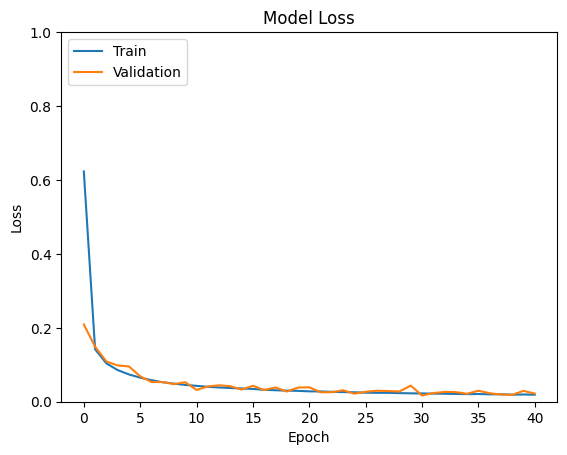

In [18]:
# plot the validation and training accuracy, and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 1)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




7950/7950 [==============================] - 8s 967us/step


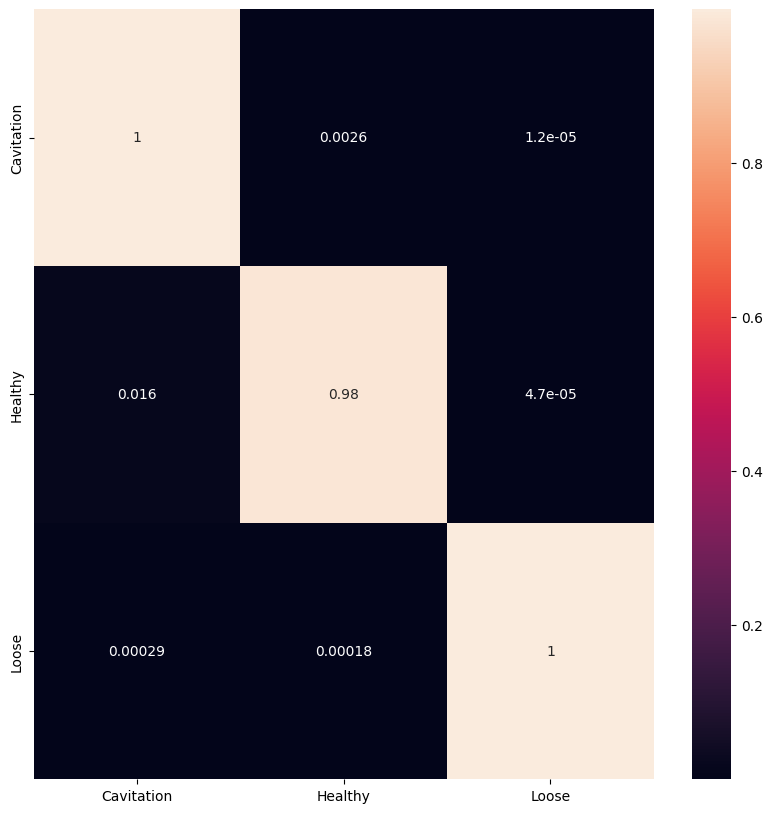

              precision    recall  f1-score   support

  Cavitation       0.98      1.00      0.99     84899
     Healthy       1.00      0.98      0.99     84463
       Loose       1.00      1.00      1.00     85028

    accuracy                           0.99    254390
   macro avg       0.99      0.99      0.99    254390
weighted avg       0.99      0.99      0.99    254390



In [20]:
# Test the model on test data and draw confusion matrix

def inv_Transform_result(y_pred, enc):
    y_pred = y_pred.argmax(axis=1)
    y_pred = enc.inverse_transform(y_pred)
    return y_pred

# for 2d convolutional autoencoder
# y_pred = model.predict(X_test)

# for 2d convolution with last 2
y_pred = model.predict([X_test, X_last2_test])


y_pred = inv_Transform_result(y_pred, encoder)
y_compare = inv_Transform_result(y_test, encoder)


from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize=(10,10))
cm = confusion_matrix(y_compare, y_pred, labels=encoder.classes_)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
f = sns.heatmap(cm, annot=True, xticklabels=encoder.classes_, yticklabels=encoder.classes_)

# confusion matrix with percentages

plt.show()

report = classification_report(y_compare, y_pred, labels=encoder.classes_)
print(report)



In [22]:
# now save the model as tf lite
import tensorflow as tf
# from tinymlgen import port



def representative_dataset_gen():
    for data_1, data_2 in zip(X_train, X_last2_train):  # X_train_1 and X_train_2 should be your two input datasets
        data_1 = np.expand_dims(data_1, axis=0).astype(np.float32)  # Adding batch dimension and ensuring type is float32
        data_2 = np.expand_dims(data_2, axis=0).astype(np.float32)  # Adding batch dimension and ensuring type is float32
        yield [tf.dtypes.cast(data_1, tf.float32), tf.dtypes.cast(data_2, tf.float32)]

def cnn_representative_dataset():
  for data in tf.data.Dataset.from_tensor_slices(X_test).batch(1).take(100):
    # Model has only one input so each data point has one element.
    # data = np.expand_dims(data, axis=-1)
    yield [tf.dtypes.cast(data, tf.float32)]
    


fullint_converter_cnn = tf.lite.TFLiteConverter.from_keras_model(model)
fullint_converter_cnn.optimizations = [tf.lite.Optimize.DEFAULT]
fullint_converter_cnn.representative_dataset = representative_dataset_gen
fullint_tflite_model_cnn = fullint_converter_cnn.convert()

# Save the model.
with open('cnn_model_fullint_vibeonly.tflite', 'wb') as f:
    f.write(fullint_tflite_model_cnn)

INFO:tensorflow:Assets written to: C:\Users\princ\AppData\Local\Temp\tmpatu07sv1\assets


INFO:tensorflow:Assets written to: C:\Users\princ\AppData\Local\Temp\tmpatu07sv1\assets
c:\Users\princ\miniconda3\envs\tensorflowgpu\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


: 